# Beatifulsoup

## News Crawler
News Information:
- Title
- Description
- datetime
- Category
- Agency

The request is sent via the python `requests` library and for the specified website, there is no need to define the user agent(basic requested is accepted  by the website). A parser is then needed to create a nested/tree structure of the HTML data. The `html5lib` library is used. 

After inspecting the pages html code, it was clear that the news part is within a division tag with `id = news-list-inner` and each news is in a separate division tag with `class = news-article-min-content`. Each news is parsed and the required fields are extracted from different parts of it. Also, there are two counters keeping track of news articles saved and pages crawled. As observed, the news pages can easily be accessed by a single url pluse a page number at the end. 


The fileds are then saved to a csv file using the `csv` library for later use.

### Currency News Crawler

In [ ]:
# crawl data + save into csv file
# parse news list page

import requests
from bs4 import BeautifulSoup

URL2 = "https://www.tgju.org/news/category/93965/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%A7%D8%B1%D8%B2%DB%8C/page/"

news_record = 0
page_number = 1
newss2=[]  # a list to store news

while (news_record <= 500):
  print(page_number)
  r = requests.get(URL2 + str(page_number))

  soup = BeautifulSoup(r.content, 'html5lib') # first argument is the html content that needs to be parsed 
                                                  # and the second argumnent is the html parser that will be used
   
  table = soup.find('div', attrs = {'id':'news-list-inner'}) 
  i = 0
   
  for row in table.findAll('div',
                         attrs = {'class':'news-article-min-content'}):
    if i == 0:
      i = i + 1
      continue
    news = {}
    cat = row.find('a', attrs = {'class': 'news-article-tag outline-tag'})
    news['category'] = cat.text
    agency = row.find('a', attrs = {'class':'news-article-tag news-article-tag'})
    if (agency):
      news['agency'] = agency.text
    else:
        try:
            
            agency = row.find_all('span', class_='news-article-tag')
            news['agency'] = agency[0].text
        except:
            agency = 'NULL'
    news['title'] = row.h2.a.text
    description = row.find_all('span', class_='news-article-description')
    news['description'] = description[0].text
    news['datetime'] = row.time['datetime']
    newss2.append(news)
    news_record = news_record + 1
  page_number = page_number + 1

In [21]:
import csv

filename = 'currency_news.csv'
with open(filename, 'w', newline='', encoding="utf-8") as f:
    w = csv.DictWriter(f,['category','agency','title','description','datetime'])
    w.writeheader()
    for news in newss2:
        w.writerow(news)

### Gold News Crawler

In [ ]:
# parse news list page

import requests
from bs4 import BeautifulSoup

URL1 = "https://www.tgju.org/news/category/93964/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%B7%D9%84%D8%A7-%D9%88-%D8%B3%DA%A9%D9%87/page/"

news_record = 0
page_number = 1
newss=[]  # a list to store news

while (news_record <= 500):
  #print(page_number)
  r = requests.get(URL1 + str(page_number))

  soup = BeautifulSoup(r.content, 'html5lib') # first argument is the html content that needs to be parsed 
                                                  # and the second argumnent is the html parser that will be used
   
  table = soup.find('div', attrs = {'id':'news-list-inner'}) 
  i = 0
   
  for row in table.findAll('div',
                         attrs = {'class':'news-article-min-content'}):
    if i == 0:
      i = i + 1
      continue
    news = {}
    cat = row.find('a', attrs = {'class': 'news-article-tag outline-tag'})
    news['category'] = cat.text
    agency = row.find('a', attrs = {'class':'news-article-tag news-article-tag'})
    if (agency):
      news['agency'] = agency.text
    else:
      agency = row.find_all('span', class_='news-article-tag')
      news['agency'] = agency[0].text
    news['title'] = row.h2.a.text
    description = row.find_all('span', class_='news-article-description')
    news['description'] = description[0].text
    news['datetime'] = row.time['datetime']
    newss.append(news)
    news_record = news_record + 1
  page_number = page_number + 1

In [17]:
import csv

filename = 'gold_news.csv'
with open(filename, 'w', newline='', encoding="utf-8") as f:
    w = csv.DictWriter(f,['category','agency','title','description','datetime'])
    w.writeheader()
    for news in newss:
        w.writerow(news)

## Part 1: Top Agency

What has to be done first, is to merge both dataframes together.

In [15]:
import pandas as pd
filename = 'currency_news.csv'
currency_df = pd.read_csv(filename)
currency_df

,category,agency,title,description,datetime
0,اخبار ارزی,دنیای اقتصاد,قالیباف: آقای اوجی! به جای دست گدایی دراز کردن...,\nخبرگزاری دانشجو : قالیباف گفت: آقای اوجی، اگ...,2022-10-18 11:11:57
1,اخبار ارزی,اقتصاد آنلاین,سرمایه گذاری خارجی در ایران ۸۲ درصد کاهش یافت,\nدر شش ماهه نخست امسال حجم سرمایه‌گذاری خارجی...,2022-10-18 11:06:39
2,اخبار ارزی,اقتصاد آنلاین,رشد ۲ درصدی قیمت بیت کوین,\nدر حال حاضر بازار رمزارزها شاهد رشد بوده و ا...,2022-10-18 11:06:37
3,اخبار ارزی,ارانیکو,دلار آماده ورود به کانال ۲۸ هزار تومانارز&nbsp;,\nرئیس کانون صرافان از آمادگی دلار برای ورود ب...,2022-10-18 10:46:46
4,اخبار ارزی,دیجی کالا مگ,آیفون ۲۰۰۷ با قیمت ۳۹ هزار دلار در یک مزایده ب...,\n,2022-10-18 10:46:38
...,...,...,...,...,...
508,اخبار ارزی,اقتصاد آنلاین,رکورد جهانی قیمت الماس شکسته شد,\nیک الماس صورتی رنگارنگ فانتزی پس از فروش به ...,2022-10-08 13:51:29
509,اخبار ارزی,اخبار بانک,کلاف سردرگم تفکیک حساب تجاری از شخصی باز شد,\nپس از ناهماهنگی‌های فراوان بین بانک مرکزی و ...,2022-10-08 13:46:40
510,اخبار ارزی,اخبار بانک,بالاترین رشد شبکه برای ریپل طی سه ماه اخیر,\nبا توجه به داده‌های ارائه شده توسط پلتفرم آم...,2022-10-08 13:46:38
511,اخبار ارزی,سایت طلا,بزرگترین هک تاریخ با سرقت ۵۷۰ میلیون دلار !,\nصرافی بایننس از هک بزرگی خبر داده که طی آن ب...,2022-10-08 13:31:56


In [16]:
import pandas as pd
filename = 'gold_news.csv'
gold_df = pd.read_csv(filename)
gold_df

,category,agency,title,description,datetime
0,اخبار طلا و سکه,نبض بازار,چه عواملی مانع قیمت جهانی طلا می‌شود؟,\nقیمت طلا هنوز هم نزدیک به پایین‌ترین سطح در ...,2022-10-18 10:16:43
1,اخبار طلا و سکه,سایت طلا,فشار قیمت دلار بر طلا/ کاهش جذابيت طلا براي سر...,\nسیاست افزایش نرخ بهره بانک مرکزی آمریکا در س...,2022-10-18 10:02:36
2,اخبار طلا و سکه,اخبار ویژه,طلا دست در دست ریسک‌پذیری,\nبا تداوم سیاست‌های کووید صفر در چین و با وجو...,2022-10-18 09:37:44
3,اخبار طلا و سکه,اخبار بانک,طلای جهانی با تزلزل دلار ثابت شد,\nقیمت طلا امروز(سه‌شنبه ۱۸ اکتبر) با توقف رشد...,2022-10-18 09:31:32
4,اخبار طلا و سکه,اقتصاد نیوز,سیگنال جدید به بازار سکه در ایران /پیش بینی قی...,\nنرخ دلار دیروز تا مرز مقاومتی ۳۲ هزار و ۸۰۰ ...,2022-10-18 09:16:39
...,...,...,...,...,...
508,اخبار طلا و سکه,ایران اکونومیست,مدال نقره جودو جام ریاست جمهوری تاجیکستان به ف...,\nنماینده وزن منهای ۸۱ کیلوگرم جودو ایران در م...,2022-09-19 20:01:37
509,اخبار طلا و سکه,نبض بورس,گزارش بازار‌ها امروز ۲۸ شهریور ۱۴۰۱ | قیمت بیت...,\nبه صورت روزانه نبض بورس وضعیت بازار‌های مواز...,2022-09-19 19:51:25
510,اخبار طلا و سکه,نبض بورس,قیمت سکه امروز دوشنبه ۲۸ شهریور ۱۴۰۱/ سکه به د...,\nمعاملات بازار طلا و سکه در دومین روز کاری هف...,2022-09-19 18:31:33
511,اخبار طلا و سکه,اقتصاد آنلاین,قیمت طلا، قیمت دلار، قیمت سکه و ارز بیست و هشت...,\nامروز در بازار ارز و طلا قیمت دلار در صرافی ...,2022-09-19 17:06:06


The whole dataframe's index is then reset for better view. Next step is to count each aganecy's occurance within each category and return the top five(most occurances). This can be done using the `groupby` mehtod on the category column and performing a lambda function for each category. The lambda function will count the occurance of each agency's name by the `values_count()` method. The output is in descending order, so the first five is selected.

In [4]:
df = currency_df.append(gold_df).reset_index()

C:\Users\J\AppData\Local\Temp\ipykernel_9324\2123789084.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = currency_df.append(gold_df).reset_index()


In [5]:
top5 = df.groupby('category')['agency'].apply(lambda x: x.value_counts()[0:5]).reset_index()
top5

,category,level_1,agency
0,اخبار ارزی,دیجی کالا مگ,55
1,اخبار ارزی,اقتصاد نیوز,54
2,اخبار ارزی,اقتصاد آنلاین,39
3,اخبار ارزی,دنیای اقتصاد,38
4,اخبار ارزی,نبض بازار,30
5,اخبار طلا و سکه,نبض بازار,99
6,اخبار طلا و سکه,سایت طلا,76
7,اخبار طلا و سکه,اقتصاد نیوز,61
8,اخبار طلا و سکه,اقتصاد آنلاین,61
9,اخبار طلا و سکه,اخبار ویژه,51


## Part 2: Daily News Trend

To plot the time trend, the datetime columns of both dataframs needs to be converted to `datetime` type in the first step. Next, it is set as the index column of the dataframe. The data is first grouped by the date of index and the number of news published in each day is calculated by the aggrigation function `len`. The counts are then ploted by `matplotlib`. The x-axis labels are rotaed by 90 degrees for better visualization. 

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

gold_df['datetime'] = pd.to_datetime(gold_df['datetime'])
gold_df = gold_df.set_index('datetime')
gold_count = gold_df.groupby([gold_df.index.date]).agg(len)

currency_df['datetime'] = pd.to_datetime(currency_df['datetime'])
currency_df = currency_df.set_index('datetime')
currency_count = currency_df.groupby([currency_df.index.date]).agg(len)

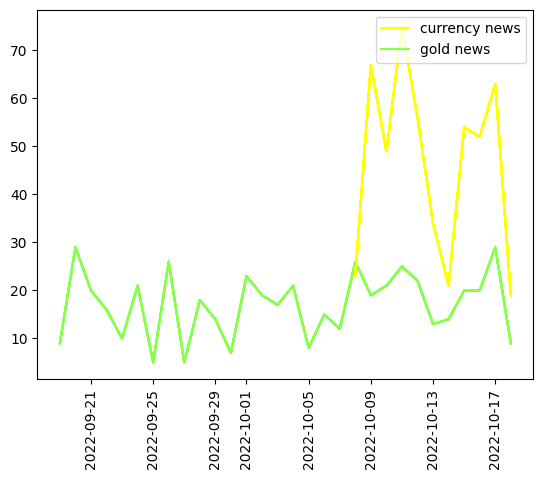

In [31]:
series1 = plt.plot(gold_count, label = 'gold news', color='#88ff4d')
plt.plot(gold_count, label = 'gold news', color='#88ff4d')

series2 = plt.plot(currency_count, label = 'currency news', color='yellow')
plt.plot(currency_count, label = 'currency news', color='yellow')

plt.legend(handles=[series2[0], series1[0]], loc=1)
plt.xticks(rotation=90);